# By-Amit Ramesh Jaiswal

# Task 1: Prediction using Supervised ML

## For this task, we will be applying Linear Regression for predicting student's percentage based on the no. of study hours

## Data Source:http://bit.ly/w-data

## Problem statement: What will be the predicted score if student studies for 9.25 hours/day.



In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#Import the data
df=pd.read_csv("student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Now let's plot a graph of our data so that it will give us clear idea about data.**

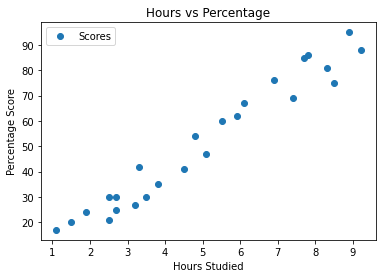

In [6]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**By observing the plot, we can clearly observe a strong linear relationship between the 2 variables and can imagine a straight trend line, making them ideal for Linear Regression application.**

## Data Preparation

After that, we need to extract the dependent and independent variables from the given dataset. The independent variable is hours, and the dependent variable is score. Below is code for it:

In [7]:
x1 = df.iloc[:,0].values
y1 = df.iloc[:,1].values

x = x1.reshape(-1,1)
y = y1.reshape(-1,1)

**We make use of Scikit Learn's train_test_split() method for splitting data into training and testing data in a 80:20 split ratio.**

# Linear Regression Model
Now we prepare the data and split it in test data

In [8]:
# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

# Training the model

In [9]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)

LinearRegression()

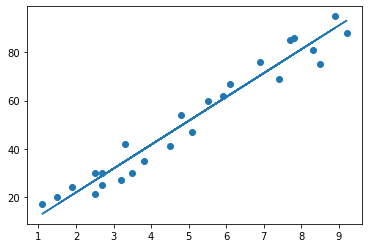

In [10]:
#plottting regression line
line = linearRegressor.coef_*x+linearRegressor.intercept_

plt.scatter(x, y)
plt.plot(x, line)
plt.show()

# Checking the accuracy scores for training and test set

In [11]:
print('Test Score')
print(linearRegressor.score(x_test, y_test))
print('Training Score')
print(linearRegressor.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


## Now we make predictions

In [34]:
#Prediction of Test and Training set result  
y_pred= linearRegressor.predict(x_test)  
x_pred= linearRegressor.predict(x_train)  

In [15]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a date', linearRegressor.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [[93.69173249]]


## Model Evaluation
As we are dealing with numerical data, Mean Absolute Error,Mean Squared Error would be a great choice for a metric for evaluating the Linear Regression model.

In [37]:
#model evaulation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


# Visualizing the Training set results

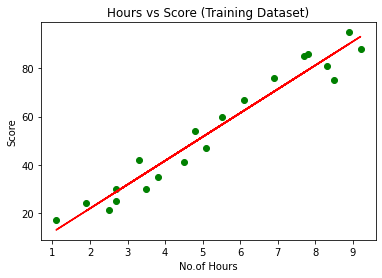

In [28]:
plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, y_pred, color="red")    
plt.title("Hours vs Score (Training Dataset)")  
plt.xlabel("No.of Hours")  
plt.ylabel("Score")  
plt.show()   

# Visualizing the Test set results

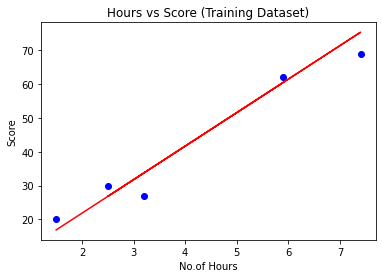

In [36]:
plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_test, y_pred, color="red")    
plt.title("Hours vs Score (Training Dataset)")  
plt.xlabel("No.of Hours")  
plt.ylabel("Score")  
plt.show()   

## Conclusion
**After successful model building and obtaining predictions on test data, we can conclude that 'if a student studies for 9.25 hours/day, he is expected to score 91.47 marks.**